In [ ]:
!pip install autolens

import autolens as al
import autolens.plot as aplt

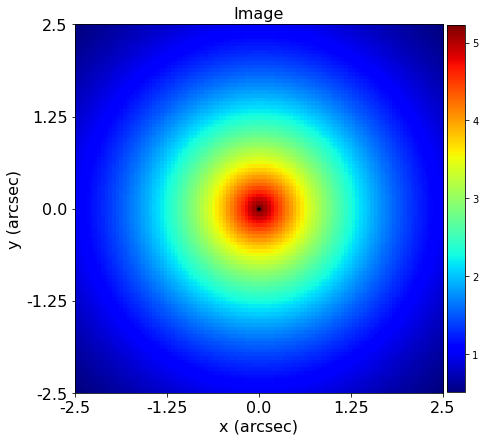

In [ ]:
# define a coordinate grid
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05, sub_size=2)

# define a source galaxy
sersic_light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0),
    intensity=1.0,
    effective_radius=2.5,
    sersic_index=1.0,
)
source_galaxy = al.Galaxy(redshift=1.0, light=sersic_light_profile)

# plot the intensity of the source
source_galaxy_plotter = aplt.GalaxyPlotter(galaxy=source_galaxy, grid=grid)
source_galaxy_plotter.figures(image=True)

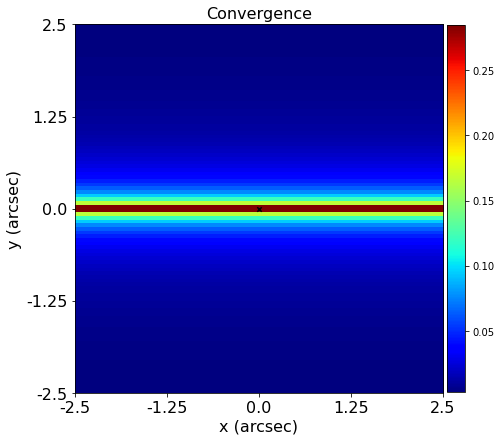

In [ ]:
# define a lens galaxy with a constant linear dark matter density

lens_galaxy = al.Galaxy(redshift=0.5, mass_1=al.mp.dark_mass_profiles.EllipticalNFW(centre=(0, 0), elliptical_comps=(0, 1.0), scale_radius=1000.0))
lens_galaxy_plotter = aplt.GalaxyPlotter(galaxy=lens_galaxy, grid=grid)
lens_galaxy_plotter.figures(convergence=True)

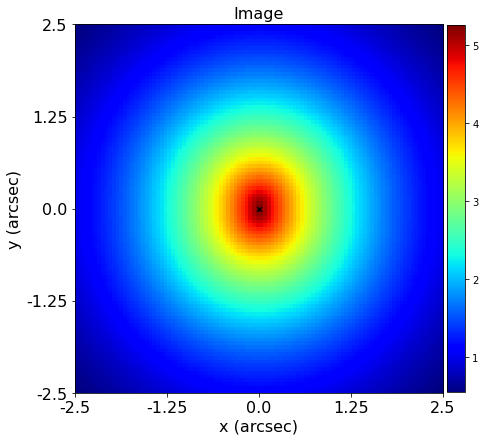

In [ ]:
# observe the gravitational lensing effect
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])
tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)

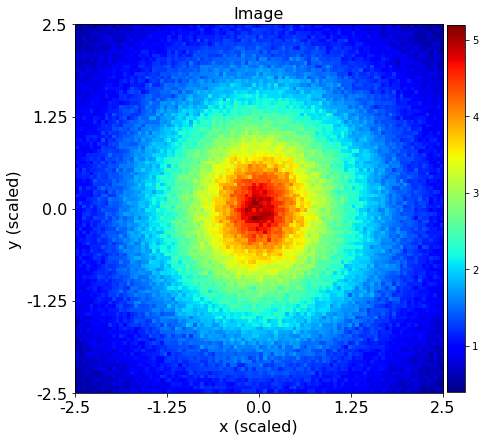

In [ ]:
# simulate observation from a real telescope
psf = al.Kernel2D.from_gaussian(
    shape_native=(11, 11), sigma=0.1, pixel_scales=grid.pixel_scales
)

simulator = al.SimulatorImaging(
    exposure_time=300.0,
    background_sky_level=1.0,
    psf=psf,
    add_poisson_noise=True,
)
imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)